
<span style="font-size:26px;">**Predictive Modeling for Customer Churn**</span>  


A Comparative Analysis of Decision Tree, Random Forest, and Neural Network Classifier

In [2]:
#Importing the initial necessary libraries

import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


**Loading Data Set**

In [38]:
#Loading the data set

data = pd.read_csv('CustomerChurn.csv')              
print(data.head())               #Raw Data


   SeniorCitizen Dependents  tenure InternetService OnlineSecurity  \
0              0         No       1             DSL             No   
1              0         No      34             DSL            Yes   
2              0         No       2             DSL            Yes   
3              0         No      45             DSL            Yes   
4              0         No       2     Fiber_optic             No   

  OnlineBackup TechSupport StreamingTV StreamingMovies        Contract  \
0          Yes          No          No              No  Month_to_month   
1           No          No          No              No        One_year   
2          Yes          No          No              No  Month_to_month   
3           No         Yes          No              No        One_year   
4           No          No          No              No  Month_to_month   

  PaperlessBilling       PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes    Electronic_check           29.85   

In [39]:
#summarized description of data set
data.describe

<bound method NDFrame.describe of       SeniorCitizen Dependents  tenure InternetService OnlineSecurity  \
0                 0         No       1             DSL             No   
1                 0         No      34             DSL            Yes   
2                 0         No       2             DSL            Yes   
3                 0         No      45             DSL            Yes   
4                 0         No       2     Fiber_optic             No   
...             ...        ...     ...             ...            ...   
7027              0        Yes      24             DSL            Yes   
7028              0        Yes      72     Fiber_optic             No   
7029              0        Yes      11             DSL            Yes   
7030              1         No       4     Fiber_optic             No   
7031              0         No      66     Fiber_optic            Yes   

     OnlineBackup TechSupport StreamingTV StreamingMovies        Contract  \
0           

In [40]:
#showing data types of each column
data.dtypes

SeniorCitizen         int64
Dependents           object
tenure                int64
InternetService      object
OnlineSecurity       object
OnlineBackup         object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Distribution of target column**

Text(0.5, 1.0, 'Distribution of Target Column')

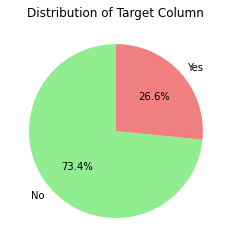

In [41]:
#distribution of target column

value_counts = data['Churn'].value_counts()

# Plotting the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])

# Adding title
plt.title('Distribution of Target Column')



**Convert labels to numeric data for this framework**

In [42]:
#importing the lable encoder
from sklearn.preprocessing import LabelEncoder

#convert labels to numeric for this framework
le = LabelEncoder()
data['Churn']= le.fit_transform(data['Churn'])

data['Dependents']= le.fit_transform(data['Dependents'])

data['InternetService']= le.fit_transform(data['InternetService'])
data['OnlineSecurity']= le.fit_transform(data['OnlineSecurity'])
data['OnlineBackup']= le.fit_transform(data['OnlineBackup'])

data['TechSupport']= le.fit_transform(data['TechSupport'])
data['StreamingTV']= le.fit_transform(data['StreamingTV'])
data['StreamingMovies']= le.fit_transform(data['StreamingMovies'])
data['Contract']= le.fit_transform(data['Contract'])
data['PaperlessBilling']= le.fit_transform(data['PaperlessBilling'])      
data['PaymentMethod']= le.fit_transform(data['PaymentMethod'])

In [43]:
#Preprocessing: extract independent-x and dependent-y variables        
y_data = data['Churn']
X_data = data.drop('Churn', axis =1)
data.head()     

,SeniorCitizen,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,2,0,0,0,0,1,2,29.85,29.85,0
1,0,0,34,0,2,0,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,2,0,2,2,0,0,0,0,1,3,53.85,108.15,1
3,0,0,45,0,2,0,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,2,1,0,0,0,0,0,0,1,2,70.70,151.65,1


**Spliting Data Set Into Training and Testing Sets**

In [44]:
#importing train_test_split library
from sklearn.model_selection import train_test_split 

#Get Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 10)
print('Training data size: ', X_train.shape)
print('Test data size: ', X_test.shape, )     

Training data size:  (5274, 14)
Test data size:  (1758, 14)


**Training The Data Set Using The DecisionTreeClassifier**

In [45]:
#imopring the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

DTclass = DecisionTreeClassifier(criterion='entropy', random_state=0) 
DTclass.fit(X_train, y_train)    
DTclass = DTclass  
pred_y = DTclass.predict(X_test)

**Evaluating the DT-Model Using Confusion Matrix, Precision, Recall, F1-Score**

In [46]:
print('Classification report for DT\n')
C_matrix = confusion_matrix(y_test, pred_y)
print(classification_report(y_test, pred_y))
print(C_matrix)



Classification report for DT

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1297
           1       0.51      0.52      0.52       461

    accuracy                           0.74      1758
   macro avg       0.67      0.67      0.67      1758
weighted avg       0.75      0.74      0.75      1758

[[1067  230]
 [ 219  242]]


**Visualizing the confusion matrix of DT-Model**

C:\Users\Jerome\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


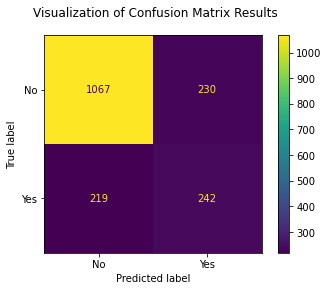

In [47]:
#Visualize confusion matrix
graph_C_matrix = plot_confusion_matrix(DTclass, X_test, y_test, display_labels=['No', 'Yes'])
graph_C_matrix.figure_.suptitle("Visualization of Confusion Matrix Results")
plt.show()

**Evaluation Results**

Accuracy: The model achieved an overall accuracy of approximately 79%.

Precision: Precision for class 0 (no churn) is 83%, and for class 1 (churn), it is 62%.

Recall: Recall for class 0 is 90%, while for class 1, it is 48%.

F1-Score: The weighted average F1-score is around 0.78.




**Confusion Matrix**

The confusion matrix provides a detailed breakdown of correct and incorrect predictions.

True Positives (TP): 220, True Negatives (TN): 1164, False Positives (FP): 133, False Negatives (FN): 241.




**Analysis**

The model performs better in predicting instances of no churn (class 0) compared to churn (class 1).

The recall for class 1 is relatively low (48%), indicating the model might miss some instances of actual churn.

The precision for class 1 is moderate (62%), suggesting there might be some false positives.

In summary, while the model demonstrates good overall accuracy, there is room for improvement, particularly in capturing instances of churn and minimizing false positives. Further optimization or exploration of different models could be considered.

**Training The Data Set Using The RandomForestClassifier**

In [48]:
#importing the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Training data set with the RandomForestClassifier
RFclass = RandomForestClassifier(n_estimators=10, bootstrap=True, criterion='entropy', random_state=0)
RFclass.fit(X_train, y_train)    
RFclass = RFclass  
pred_y = RFclass.predict(X_test)

**Confusion Matrix and Classification reports for RF-Model**

Confusion Matrix: 
 [[1164  133]
 [ 241  220]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1297
           1       0.62      0.48      0.54       461

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.70      1758
weighted avg       0.77      0.79      0.78      1758

Accuracy: =  0.7872582480091013


C:\Users\Jerome\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


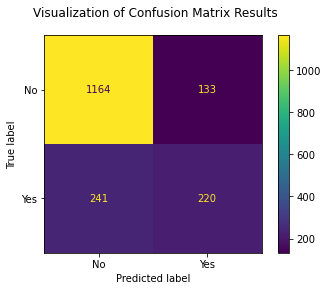

In [49]:
Cmatrix = confusion_matrix(y_test, pred_y)
print('Confusion Matrix: \n', Cmatrix)
print('Classification Report: \n', classification_report(y_test, pred_y))
print("Accuracy: = ", accuracy_score(y_test, pred_y)) 

#Visualize confusion matrix
graph_Cmatrix = plot_confusion_matrix(RFclass, X_test, y_test, display_labels=['No', 'Yes'])
graph_Cmatrix.figure_.suptitle("Visualization of Confusion Matrix Results")
plt.show()

**Classification Report**

Accuracy: The Random Forest (RF) classifier achieved an accuracy of approximately 78.73% on the test set.

Precision: Precision for class 0 (no churn) is 83%, and for class 1 (churn), it is 62%.

Recall (Sensitivity): Recall for class 0 is 90%, while for class 1, it is 48%.

F1-Score: The weighted average F1-score is around 0.78.
    
  
  
  
**Confusion Matrix**

The confusion matrix provides a detailed breakdown of correct and incorrect predictions.

True Positives (TP): 220

True Negatives (TN): 1164

False Positives (FP): 133

False Negatives (FN): 241.
    
   
   
   
**Analysis**

The RF classifier demonstrates performance comparable to the Decision Tree model, with an accuracy of around 78.73%.

Similar to the Decision Tree, the RF model performs better in predicting instances of no churn (class 0) compared to churn (class 1).

The recall for class 1 is relatively low (48%), indicating that the model might miss some instances of actual churn.

The precision for class 1 is moderate (62%), suggesting there might be some false positives.



**Training the data set using Neural Network Classifier**

In [53]:
#importing MLPClassifier and StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Data Scaling
scaleD = StandardScaler()
scaled_X_train = scaleD.fit_transform(X_train)
scaled_X_test = scaleD.transform(X_test)   
scaleD = scaleD

print(scaled_X_train.shape, ': Training data size')
print(scaled_X_test.shape, ': Test data size')           



(5274, 14) : Training data size
(1758, 14) : Test data size


In [54]:

#Training the data sets with MLPClassifier
NNclass = MLPClassifier(hidden_layer_sizes=(6,6), activation="relu", max_iter=200, random_state=2)
NNclass.fit(scaled_X_train, y_train)    
NNclass = NNclass  
pred_y = NNclass.predict(scaled_X_test)

C:\Users\Jerome\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Confusion Matrix and Classification reports for Neural Network Model**

In [56]:
#Confusion Matrix and Classification reports
Cmatrix = confusion_matrix(y_test, pred_y)
print('Confusion Matrix: \n', Cmatrix)
print('Classification Report: \n', classification_report(y_test, pred_y, target_names = ["No", "Yes"]))
print("Accuracy: = ", accuracy_score(y_test, pred_y)) 



Confusion Matrix: 
 [[1140  157]
 [ 193  268]]
Classification Report: 
               precision    recall  f1-score   support

          No       0.86      0.88      0.87      1297
         Yes       0.63      0.58      0.60       461

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758

Accuracy: =  0.800910125142207


C:\Users\Jerome\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


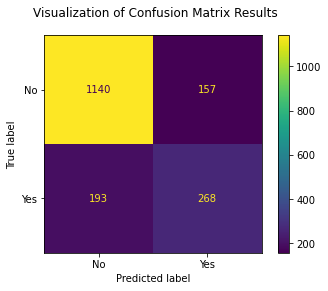

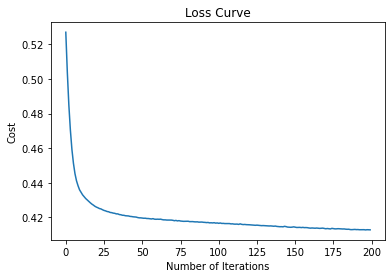

In [59]:
#Visualize confusion matrix
graph_Cmatrix = plot_confusion_matrix(NNclass, scaled_X_test, y_test, display_labels=['No', 'Yes'])
graph_Cmatrix.figure_.suptitle("Visualization of Confusion Matrix Results")
plt.show()

#Visualize the error graph
plt.plot(NNclass.loss_curve_)
plt.title("Loss Curve", fontsize=12)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

**Classification Reports**

Accuracy: The Neural Network classifier achieved an accuracy of approximately 80.09% on the test set.

Precision: Precision for class 'No' (no churn) is 86%, and for class 'Yes' (churn), it is 63%.

Recall (Sensitivity): Recall for class 'No' is 88%, while for class 'Yes', it is 58%.

F1-Score: The weighted average F1-score is around 0.80.
    
    
    
    
    
**Confusion Matrix**

The confusion matrix provides a detailed breakdown of correct and incorrect predictions.

True Positives (TP): 268

True Negatives (TN): 1140

False Positives (FP): 157

False Negatives (FN): 193.
    




**Analysis**

The Neural Network model shows an improvement in accuracy compared to the Decision Tree and Random Forest models, achieving around 80.09%.

Precision for class 'Yes' (churn) is higher (63%), indicating a better ability to identify true positives.

Recall for class 'Yes' is still relatively moderate (58%), suggesting that the model might miss some instances of actual churn.

The weighted average F1-score is around 0.80, reflecting a balanced performance.

**Comparison**


The **Neural Network model** shows a slight improvement in accuracy compared to the **Decision Tree** and **Random Forest models**.

**Precision** for class 'Yes' (churn) is higher in the Neural Network model, indicating a better ability to identify **true positives**.

The Neural Network model also demonstrates a slightly higher **recall** for class 'Yes' compared to the Decision Tree and Random Forest models.

The **F1-Score** for the Neural Network is slightly higher, indicating a more balanced performance between precision and recall.